## What is EDA - Exploratory Data Analysis

>In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Amazon is one of the leading e-commerce site today. Online shopping has become a trend now a days. But, before shopping online, people usually go to check reviews of consumers on that particular product. According to a research more than 85% of online shopping depends on reviews of the consumers. So, it is necessary to analyze the flaws in low sale of any product. That's why in this project, we am going to explore and analyze Amazon product reviews, that can be used in other similar projects too. Without talking much, let's move towards coding.

#### _Dataset for project consists of different files according to the category of products. Thus, we will perform analysis on them separately one by one_

### Importing all required libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')

#### Generic Methods to Read all json files in our project

In [2]:
def parse(path):
    raw_file = open(path, 'rb')
    for ele in raw_file:
        yield json.loads(ele)
        

def get_data_frame(path):
    idx = 0
    df_dict = {}
    for curr_dict in parse(path):
        df_dict[idx] = curr_dict
        idx += 1
    return pd.DataFrame.from_dict(df_dict, orient='index')

#### Generic Methods to Re-Arrange DataFrames

In [3]:
def rearrange_columns(my_df):
    my_df.rename({'overall':'rating', 'asin':'product_id', 'unixReviewTime':'date'}, axis=1, inplace=True)
    my_df.drop(['image', 'style', 'summary', 'reviewerName', 'reviewTime', 'reviewText'], axis=1, inplace=True)
    my_df['date'] = pd.to_datetime(df['date'], unit='s')
    my_df.drop_duplicates(inplace=True)
    
def rearrange_dates(df):
    # Rating according to Years
    df_2001 = df[df['date'] <= '2001-12-31']
    df_2002 = df[(df['date'] > '2001-12-31') & (df['date'] <= '2002-12-31')]
    df_2003 = df[(df['date'] > '2002-12-31') & (df['date'] <= '2003-12-31')]
    df_2004 = df[(df['date'] > '2003-12-31') & (df['date'] <= '2004-12-31')]
    df_2005 = df[(df['date'] > '2004-12-31') & (df['date'] <= '2005-12-31')]
    df_2006 = df[(df['date'] > '2005-12-31') & (df['date'] <= '2006-12-31')]
    df_2007 = df[(df['date'] > '2006-12-31') & (df['date'] <= '2007-12-31')]
    df_2008 = df[(df['date'] > '2007-12-31') & (df['date'] <= '2008-12-31')]
    df_2009 = df[(df['date'] > '2008-12-31') & (df['date'] <= '2009-12-31')]
    df_2010 = df[(df['date'] > '2009-12-31') & (df['date'] <= '2010-12-31')]
    df_2011 = df[(df['date'] > '2010-12-31') & (df['date'] <= '2011-12-31')]
    df_2012 = df[(df['date'] > '2011-12-31') & (df['date'] <= '2012-12-31')]
    df_2013 = df[(df['date'] > '2012-12-31') & (df['date'] <= '2013-12-31')]
    df_2014 = df[(df['date'] > '2013-12-31') & (df['date'] <= '2014-12-31')]
    df_2015 = df[(df['date'] > '2014-12-31') & (df['date'] <= '2015-12-31')]
    df_2016 = df[(df['date'] > '2015-12-31') & (df['date'] <= '2016-12-31')]
    df_2017 = df[(df['date'] > '2016-12-31') & (df['date'] <= '2017-12-31')]
    df_2018 = df[(df['date'] > '2017-12-31') & (df['date'] <= '2018-12-31')]
    
    return df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018


def getting_years_five_one_ratings():
    
    df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018 = rearrange_dates(df)
    
    dfs_1_18 = [df_2001['rating'], df_2002['rating'], df_2003['rating'], df_2004['rating'], df_2005['rating'], df_2006['rating'], df_2007['rating'], df_2008['rating'], df_2009['rating'], df_2010['rating'], df_2011['rating'], df_2012['rating'], df_2013['rating'], df_2014['rating'], df_2015['rating'], df_2016['rating'], df_2017['rating'], df_2018['rating']]

    df_list_five_1_18 = [list(x.value_counts()) for x in dfs_1_18]

    dfs_years = [x for x in range(2001, 2019)]

    df_list_five_1_18_final = [x[0] for x in df_list_five_1_18]

    df_list_one_1_18_final = [x[-1] for x in df_list_five_1_18]
    
    return dfs_years, df_list_five_1_18_final, df_list_one_1_18_final

#### Generic Methods for Plotting Graphs

In [4]:
def five_star_rating_graph():
    dfs_years, df_list_five_1_18_final, df_list_one_1_18_final = getting_years_five_one_ratings()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Number of ratings", title="Five Star (Best) Rating Tracking")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    plt.bar(dfs_years, df_list_five_1_18_final, color='#6f00ff');
    
    
def one_star_rating_graph():
    dfs_years, df_list_five_1_18_final, df_list_one_1_18_final = getting_years_five_one_ratings()
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.set(xlabel="Years", ylabel="Number of ratings", title="One Star (Worst) Rating Tracking")
    plt.xticks(dfs_years) # Or you can also pass (rotation=90) parameter if your xtick_labels are long
    plt.bar(dfs_years, df_list_one_1_18_final, color='#6f00ff');
    

def rating_boxplot(df):
    sns.boxplot(x="rating", data=df, whis=5, color="#00a2ff");
    
    
def rating_violinplot(df):
    sns.violinplot(y="rating", data=df, bw=0.1, color="#bababa");
    
    
def product_freq_graph(df):
    df['product_id'].value_counts().nlargest(40).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Product-Frequency Graph")
    plt.xlabel("Product")
    plt.ylabel("Frequency")
    plt.show()
    
    
def rating_histo_graph(df):
    df["rating"].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], figsize=(12,6), grid=True, color="#6f00ff")
    plt.title("People-Rating Graph")
    plt.xlabel("Rating")
    plt.ylabel("Number of Ratings")
    plt.show()
                      
                      
def verified_accounts_graph(df):
    df.verified.value_counts().plot(kind='bar', figsize=(8,6), grid=True, color="#6f00ff")
    plt.title("Verification-Frequency Graph")
    plt.xlabel("Verification Status")
    plt.ylabel("Frequency")
    plt.show()
                      
                      
def vote_helpfulness_graph(df):
    df_verify['vote'].value_counts().nlargest(30).plot(kind='bar', log=True, figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Helfulness of Review Graph")
    plt.xlabel("Number of Votes a Review is Helpfull")
    plt.ylabel("Frequency")
    plt.show()
                      

def most_frequent_users_graph(df):
    df['reviewerID'].value_counts().nlargest(30).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")
    plt.title("Reviewer-Frequency Graph")
    plt.xlabel("Consumer / Reviewer ID")
    plt.ylabel("Number of Reviews")
    plt.show()

# _Magazine Subscriptions_

In [5]:
df = get_data_frame('E:\\amazon-eda-datasets\\Magazine_Subscriptions.json')

In [6]:
df.head(2)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN


In [7]:
df.dtypes

overall           float64
vote               object
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
style              object
image              object
dtype: object

In [8]:
df.shape

(89689, 12)

In [9]:
rearrange_columns(df)

In [10]:
df.shape

(88486, 6)

In [11]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,5.0,9,False,AH2IFH762VY5U,B00005N7P0,2001-11-08
1,5.0,9,False,AOSFI0JEYU4XM,B00005N7P0,2001-10-31
2,3.0,14,False,A3JPFWKS83R49V,B00005N7OJ,2007-03-24
3,5.0,13,False,A19FKU6JZQ2ECJ,B00005N7OJ,2006-11-10
4,5.0,NaN,True,A25MDGOMZ2GALN,B00005N7P0,2014-07-14


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88486 entries, 0 to 89688
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   rating      88486 non-null  float64       
 1   vote        23771 non-null  object        
 2   verified    88486 non-null  bool          
 3   reviewerID  88486 non-null  object        
 4   product_id  88486 non-null  object        
 5   date        88486 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 4.1+ MB


In [13]:
print(df.isnull().sum())

rating            0
vote          64715
verified          0
reviewerID        0
product_id        0
date              0
dtype: int64


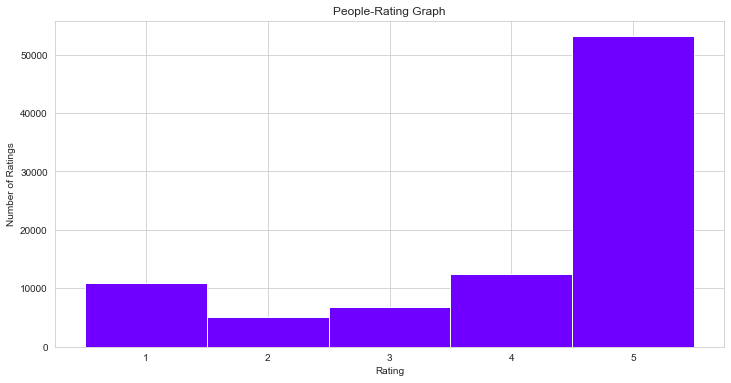

In [14]:
rating_histo_graph(df)

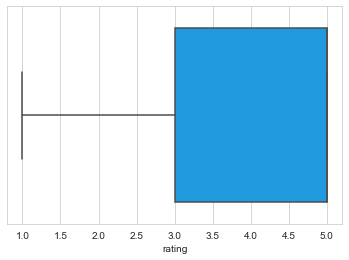

In [15]:
rating_boxplot(df)

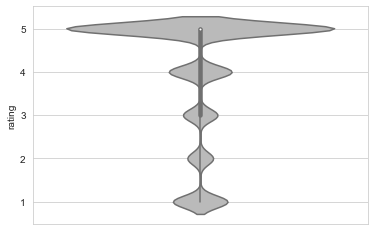

In [16]:
rating_violinplot(df)

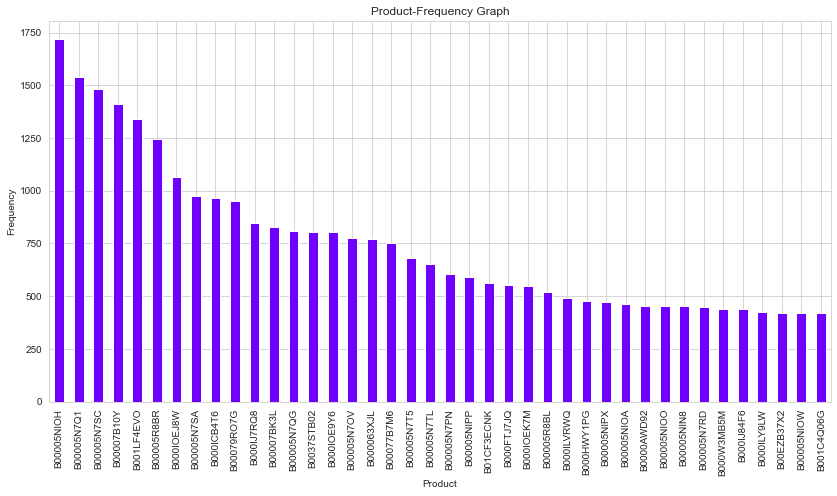

In [17]:
product_freq_graph(df)

In [18]:
df.corr()

,rating,verified
rating,1.000000,0.166468
verified,0.166468,1.000000


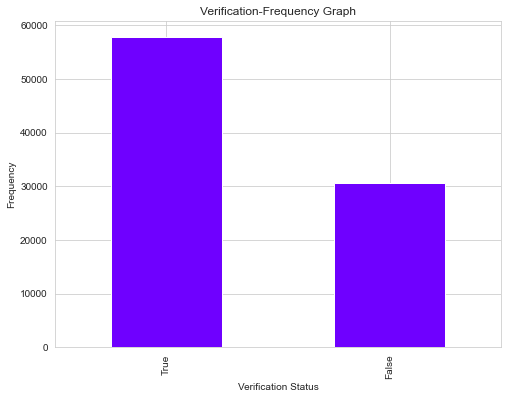

In [19]:
verified_accounts_graph(df)

In [20]:
df_verify = df.dropna()

In [21]:
df_verify.shape

(23771, 6)

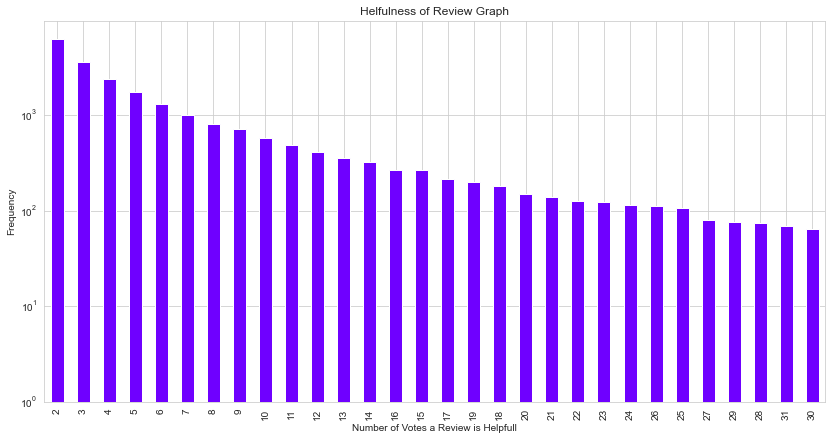

In [22]:
vote_helpfulness_graph(df)

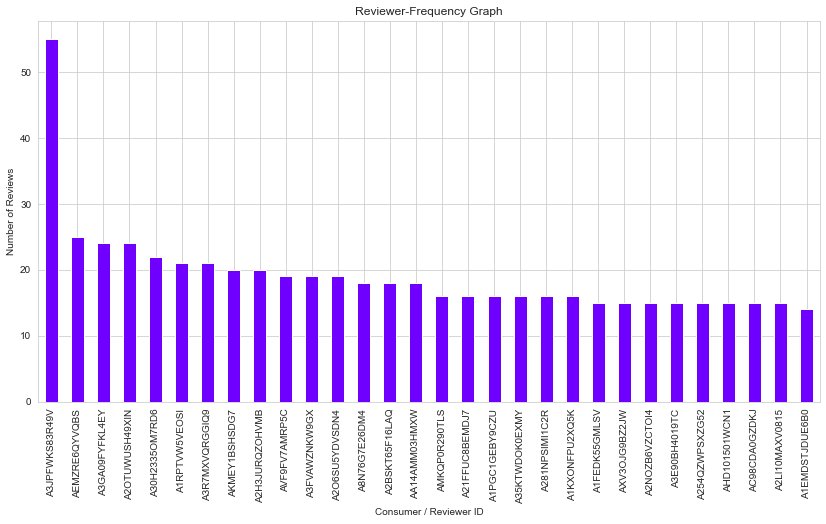

In [23]:
most_frequent_users_graph(df)

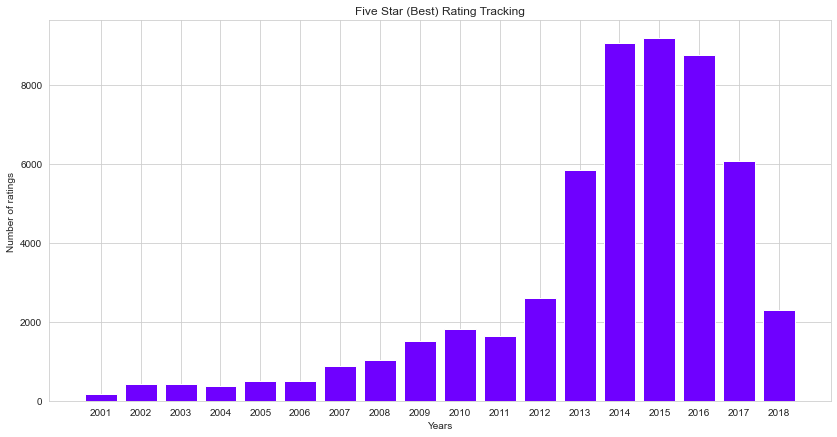

In [24]:
five_star_rating_graph()

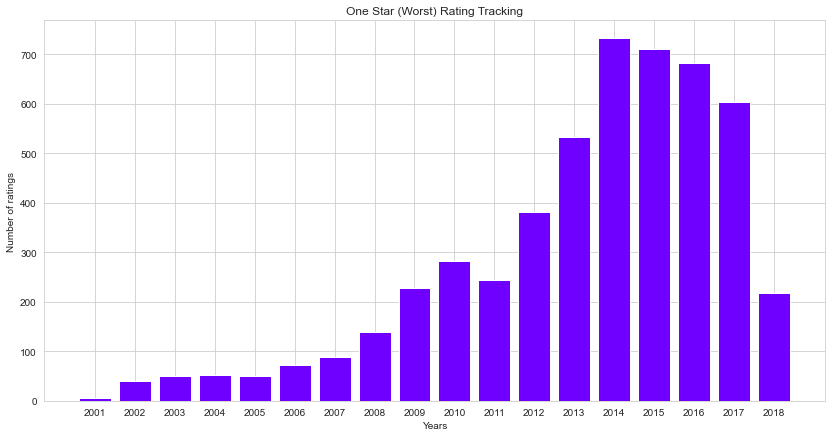

In [25]:
one_star_rating_graph()

# _Gift Cards_

In [57]:
df = get_data_frame('E:\\amazon-eda-datasets\\Gift_Cards.json')

In [58]:
df.head(2)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,1.0,25,False,"12 19, 2008",APV13CM0919JD,B001GXRQW0,{'Gift Amount:': ' 50'},LEH,"Amazon,\nI am shopping for Amazon.com gift car...",Merry Christmas.,1229644800,NaN
1,5.0,NaN,False,"12 17, 2008",A3G8U1G1V082SN,B001GXRQW0,{'Gift Amount:': ' 50'},Tali,"I got this gift card from a friend, and it was...",Gift card with best selection,1229472000,NaN


In [59]:
df.dtypes

overall           float64
vote               object
verified             bool
reviewTime         object
reviewerID         object
asin               object
style              object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
image              object
dtype: object

In [60]:
df.shape

(147194, 12)

In [61]:
rearrange_columns(df)

In [62]:
df.shape

(147160, 6)

In [63]:
df.head()

,rating,vote,verified,reviewerID,product_id,date
0,1.0,25,False,APV13CM0919JD,B001GXRQW0,2008-12-19
1,5.0,NaN,False,A3G8U1G1V082SN,B001GXRQW0,2008-12-17
2,5.0,4,False,A11T2Q0EVTUWP,B001GXRQW0,2008-12-17
3,5.0,NaN,False,A9YKGBH3SV22C,B001GXRQW0,2008-12-17
4,1.0,NaN,True,A34WZIHVF3OKOL,B001GXRQW0,2008-12-17


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147160 entries, 0 to 147193
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   rating      147160 non-null  float64       
 1   vote        6341 non-null    object        
 2   verified    147160 non-null  bool          
 3   reviewerID  147160 non-null  object        
 4   product_id  147160 non-null  object        
 5   date        147160 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 6.9+ MB


In [65]:
print(df.isnull().sum())

rating             0
vote          140819
verified           0
reviewerID         0
product_id         0
date               0
dtype: int64


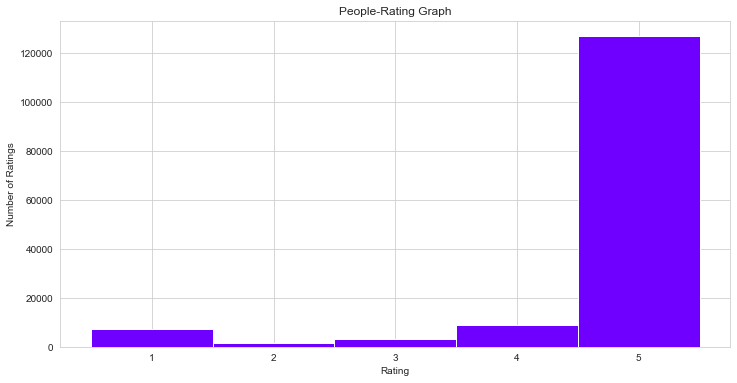

In [66]:
rating_histo_graph(df)

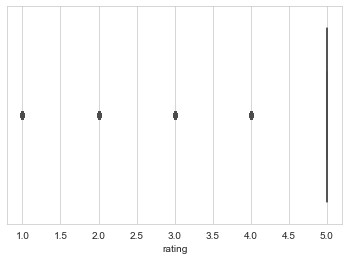

In [67]:
rating_boxplot(df)

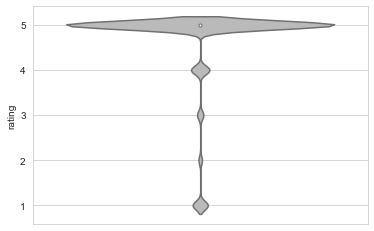

In [68]:
rating_violinplot(df)

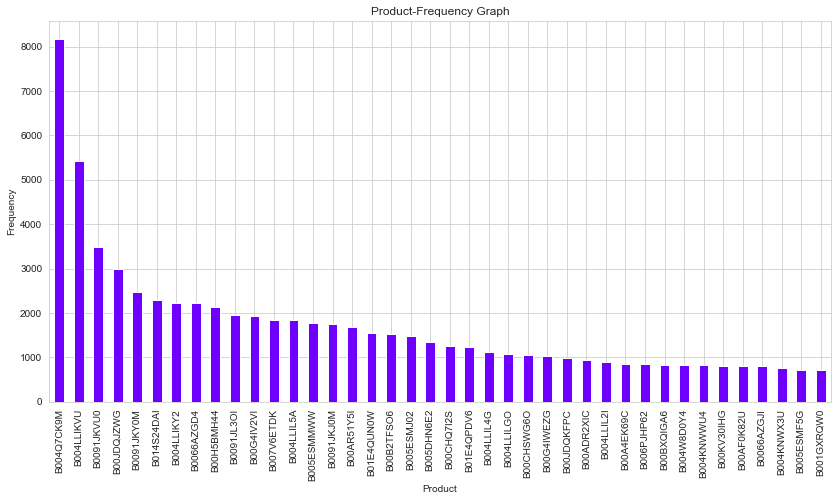

In [69]:
product_freq_graph(df)

In [70]:
df.corr()

,rating,verified
rating,1.000000,0.166299
verified,0.166299,1.000000


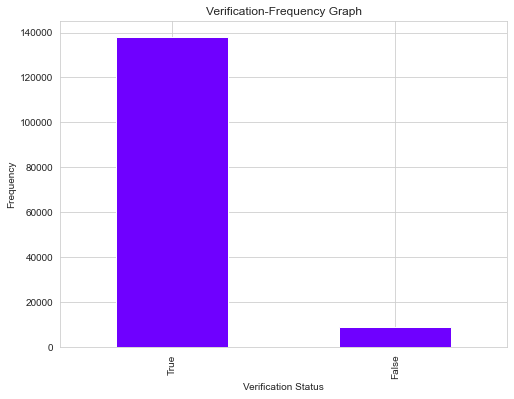

In [71]:
verified_accounts_graph(df)

In [72]:
df_verify = df.dropna()

In [73]:
df_verify.shape

(6341, 6)

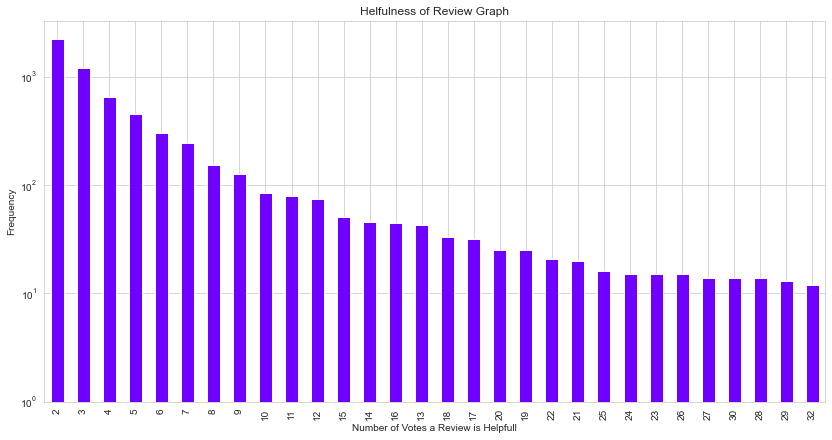

In [74]:
vote_helpfulness_graph(df)

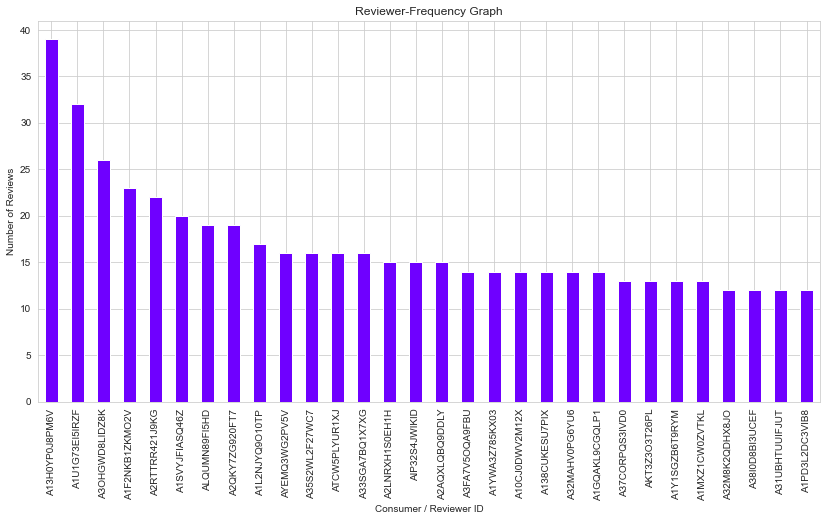

In [75]:
most_frequent_users_graph(df)

In [55]:
five_star_rating_graph()

IndexError: list index out of range

In [56]:
one_star_rating_graph()

IndexError: list index out of range